In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import folium
from folium.plugins import HeatMap

In [10]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\02_Features_Insights\01_User_Activity_Status\Skillswap_Data_Labeled.csv')

df1.head()

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,...,Technology,Photo,Video,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status,Sum_Skills_Off_ab_avg
0,Łukasz,łukasz.sezgin@gmx.de,25,Female,Local or Remote,52,14,Germany,Berlin,"['German', 'Portuguese', 'Russian', 'Mandarin ...",...,NaN,NaN,NaN,Very Satisfied,Dissatisfied,Very Satisfied,Very Dissatisfied,Dissatisfied,Active User,0
1,Bianca,bianca.herrmann@icloud.com,25,Male,Remote Only,53,14,Germany,Berlin,"['Mandarin Chinese', 'Turkish', 'Romanian', 'J...",...,NaN,17,NaN,Very Satisfied,Dissatisfied,Very Dissatisfied,Satisfied,Neutral or Average,Inactive,1
2,Adlan,adlan.jacobi jäckel@gmx.de,21,Female,Local or Remote,53,13,Germany,Berlin,['Spanish'],...,NaN,7,NaN,Satisfied,Neutral or Average,Satisfied,Very Dissatisfied,Neutral or Average,Active User,0
3,Emilio,emilio.alemdar@web.de,28,Female,Local or Remote,52,13,Germany,Berlin,"['German', 'Spanish', 'Portuguese', 'Polish']",...,NaN,NaN,NaN,Satisfied,Satisfied,Very Satisfied,Neutral or Average,Very Satisfied,Occasional User,0
4,Valentin,valentin.çetin@t-online.de,31,Male,Local or Remote,53,13,Germany,Berlin,"['Mandarin Chinese', 'Hindi', 'Turkish']",...,NaN,NaN,NaN,Neutral or Average,Very Satisfied,Neutral or Average,Very Dissatisfied,Neutral or Average,Swapper,1


# 1. General info on data set

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 165 entries, First_Name to Sum_Skills_Off_ab_avg
dtypes: float64(109), int64(2), object(54)
memory usage: 966.9+ KB


In [12]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_describe = df1.drop(columns=['Latitude', 'Longitude'])
df_describe.describe()

,Age,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,...,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off_ab_avg
count,750,15,15,15,0,0,15,11,10,0,...,67,54,43,40,59,56,56,61,62,750
mean,26,14,14,10,NaN,NaN,11,12,8,NaN,...,11,11,12,9,11,9,10,11,10,0
std,2,7,10,9,NaN,NaN,10,9,6,NaN,...,9,8,10,9,9,8,8,8,8,0
min,21,0,0,0,NaN,NaN,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
25%,25,9,10,2,NaN,NaN,2,4,4,NaN,...,3,4,2,0,2,2,5,5,4,0
50%,27,13,14,11,NaN,NaN,9,14,8,NaN,...,10,11,11,6,11,7,9,10,10,0
75%,28,18,20,18,NaN,NaN,18,18,11,NaN,...,14,15,18,13,17,15,15,16,16,1
max,32,26,31,26,NaN,NaN,27,24,17,NaN,...,31,30,37,34,35,31,33,35,28,1


In [13]:
pd.set_option('display.max_rows', None)
null_counts = df1.isnull().sum()
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
null_counts_df_transposed = null_counts_df.transpose()
null_counts_df_transposed

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,...,Technology,Photo,Video,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status,Sum_Skills_Off_ab_avg
Null Count,0,0,0,0,0,0,0,0,0,0,...,694,689,688,0,0,0,0,0,0,0


In [14]:
pd.set_option('display.max_columns', None)
unique_counts = df1.nunique()
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique Count'])
unique_counts_df_transposed = unique_counts_df.transpose()
unique_counts_df_transposed


,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Programming_and_Software_Development_off,Project_Management_off,Accounting_and_Finance_off,Marketing_and_Advertising_off,Sales_and_Customer_Service_off,Human_Resources_and_Leadership_off,Graphic_Design_and_Illustration_off,Photography_and_Photo_Editing_off,Music_instruments_Composition_and_Production_off,Writing_and_Editing_off,Arts_and_Crafts_and_DIY_Projects_off,Learning_Foreign_Languages_off,Written_and_Oral_Communication_in_Various_Languages_off,Interpretation_and_Translation_off,Computer_and_Software_Application_Operation_off,Network_Administration_and_IT_Support_off,Electronics_and_Robotics_off,Web_Design_and_Development_off,Data_Analysis_and_Visualization_off,Interpersonal_Communication_off,Conflict_Resolution_and_Mediation_off,Empathy_and_Emotional_Intelligence_off,Leadership_Skills_and_Teamwork_off,Networking_and_Relationship_Management_off,Cooking_and_Baking_off,Gardening_and_Farming_off,DIY_and_Repairs_off,Driving_and_Vehicle_Maintenance_off,First_Aid_and_Life_Saving_Techniques_off,Mathematics_and_Sciences_off,History_and_Social_Sciences_off,Literature_and_Philosophy_off,Research_Methods_and_Academic_Writing_off,Academic_Reading_and_Critique_off,Time_Management_and_Organization_off,Stress_Management_and_Mindfulness_off,Financial_Planning_and_Budgeting_off,Self_Defense_and_Personal_Safety_off,Healthcare_and_Nutrition_off,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,Count_Poetry_off,Count_Make_up_off,Count_Facials_off,Count_Pedicure_and_Manicure_off,Count_Hair_care_off,Count_Ballet_off,Count_Tap_dance_off,Count_Jazz_dance_off,Count_Salsa_off,Count_Ballroom_dance_off,Count_Piano_off,Count_Guitar_off,Count_Drumming_off,Count_Trumpet_off,Count_Composing_off,Count_Script_writing_off,Count_Play_writing_off,Count_Poetry_writing_off,Count_Caligraphy_off,Count_Blogging_off,Count_Journalism_off,Count_German_off,Count_Spanish_off,Count_Arabic_off,Count_French_off,Count_English_off,Count_Nutrition_off,Count_Fitness_and_Excercise_off,Count_Wellness_off,Count_Tennis_off,Count_Football_off,Count_Basketball_off,Count_Yoga_off,Count_Baseball_off,Count_Gymnastic_off,Count_Cooking_off,Count_Baking_off,Count_Grilling_off,Count_Meal_planning_off,Count_Sautéing_off,Count_Programming_off,Count_Graphic_design_off,Count_Data_Analysis_off,Count_Photoshop_off,Count_Social_Media_off,Count_Camera_handling_off,Count_Photo_editing_off,Count_Lighting_off,Count_Landscape_photography_off,Count_Portrait_photography_off,Count_Image_processing_off,Count_Video_editing_off,Count_Film_making_off,Count_Animation_off,Count_Motion_graphics_off,Count_Visual_effects_off,Count_Poetry writing_off,Count_Landscape photography_off,Count_Photo editing_off,Count_Motion graphics_off,Count_Social Media_off,Count_Hair care_off,Count_Film making_off,Count_Play writing_off,Count_Print making_off,Count_Visual effects_off,Count_Meal planning_off,Count_Data Analysis_off,Count_Video editing_off,Count_Fitness & Excercise_off,Count_Pet grooming_off,Count_Graphic design_off,Count_Pet training_off,Count_Pedicure & Manicure_off,Count_Jazz dance_off,Count_Camera handling_off,Count_Portrait photography_off,Count_Make-up_off,Count_Ballroom dance_off,Count_Tap dance_off,Count_Script writing_off,Count_Image processing_off,Sum_Skills_Off,Sum_Skills_Rec,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status,Sum_Skills_Off_ab_avg
Unique Count,636,750,12,4,3,750,750,1,1,561,6,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,12,12,9,0,0,12,10,7,0,7,0,9,0,0,11,0,0,12,0,9,9,8,8,10,0,0,0,4,7,3,6,9,8,8,8,9,0,7,6,3,10,7,11,8,10,5,6,0,10,9,0,0,11,0,0,0,10,0

# 2. Demographics & Locations

## 2.1 Gender Split

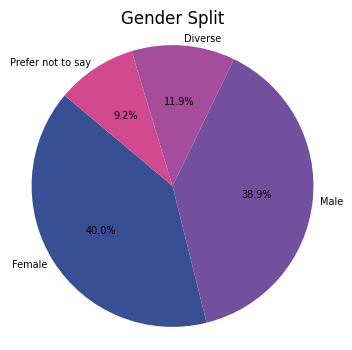

In [15]:
gender_counts = df1['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = ['#384f94', '#72509e', '#a54d9d', '#d14a8f'], textprops={'fontsize': 7}, labeldistance=1.05)
plt.title('Gender Split', fontsize=12)
plt.axis('equal')  
plt.show()

## 2.2 Age Distribution

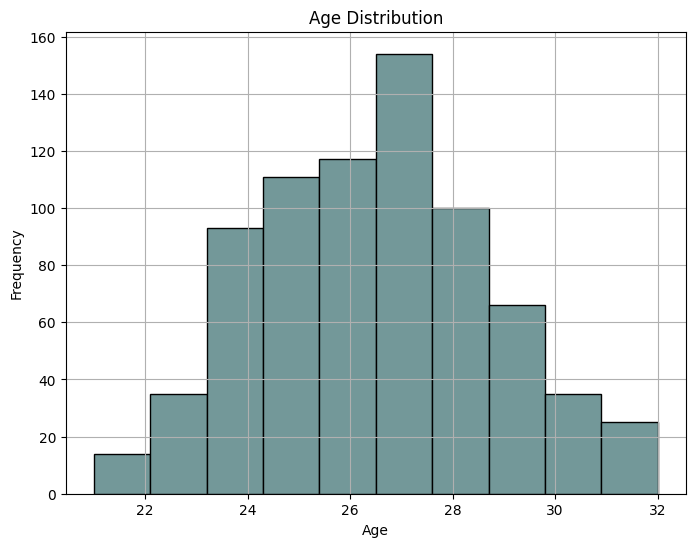

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Age'], bins=10, color='#739899', edgecolor='black') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 2.3 Age distribution by gender

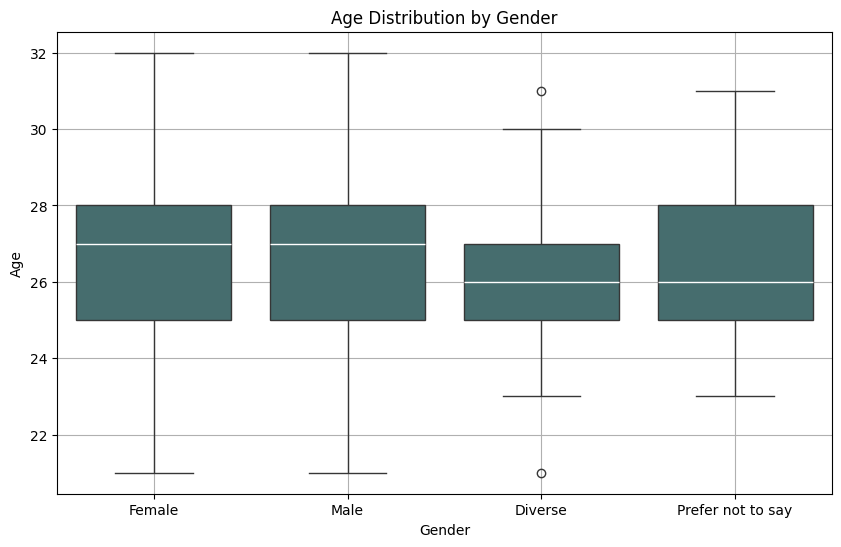

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df1, color='#407374',  medianprops={'color': 'white'})
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

## 2.4 User locations

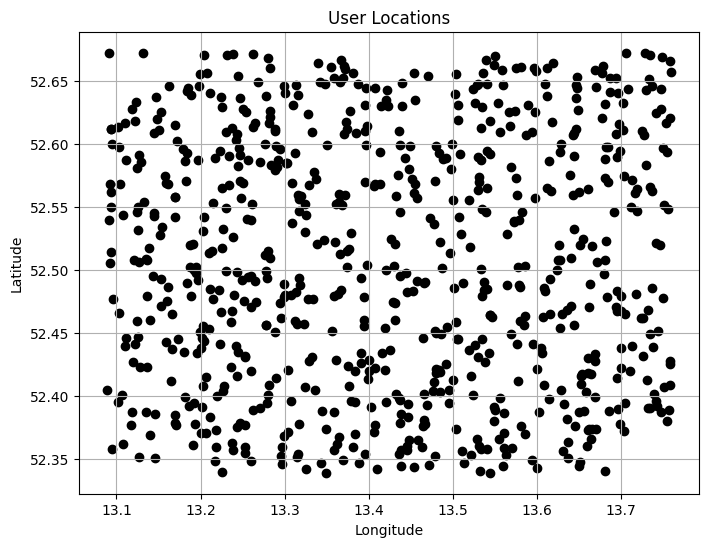

In [18]:
coordinates = [(lat, lon) for lat, lon in zip(df1['Latitude'], df1['Longitude'])]

lats, lons = zip(*coordinates)

plt.figure(figsize=(8, 6))
plt.scatter(lons, lats, color='black', marker='o')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User Locations')
plt.grid(True)
plt.show()

In [19]:
map_berlin = folium.Map(location=[52.52, 13.4050], zoom_start=10)

coordinates = df1[['Latitude', 'Longitude']].values.tolist()
heat_map = HeatMap(coordinates, radius=12)  
heat_map.add_to(map_berlin)

map_berlin

# 3. Teaching and learning ambitions

## 3.1 Top 3 most taught skill domains by gender (highlighted)

In [20]:
skill_domains = [
   "Agriculture",
    "Animal Care",
    "Art",
    "Beauty",
    "Dance",
    "Music",
    "Writing",
    "Language",
    "Health",
    "Sports",
    "Food",
    "Technology",
    "Photo",
    "Video"
]

gender_counts = {}

for skill_domain in skill_domains:
    counts = df1.groupby('Gender')[skill_domain].sum()
    gender_counts[skill_domain] = counts

gender_skill_counts_df = pd.DataFrame(gender_counts)

order = ["Female", "Male", "Diverse", "Prefer not to say"]
gender_skill_counts_df = gender_skill_counts_df.reindex(order)

gender_skill_counts_df = gender_skill_counts_df.transpose().astype(int)

def highlight_max_second_max_third_max(s):
    max_val = s.max()
    second_max_val = s.nlargest(2).min()
    third_max_val = s.nlargest(3).min()
    is_max = s == max_val
    is_second_max = s == second_max_val
    is_third_max = s == third_max_val
    colors = ['#003030' if v else '' for v in is_max]
    colors = ['#407374' if v else color for v, color in zip(is_second_max, colors)]
    colors = ['#739899' if v else color for v, color in zip(is_third_max, colors)]
    return ['background-color: %s' % color for color in colors]

styled_gender_skill_counts_df = gender_skill_counts_df.style.apply(highlight_max_second_max_third_max)

styled_gender_skill_counts_df

Gender,Female,Male,Diverse,Prefer not to say
Agriculture,226,262,73,15
Animal Care,179,121,66,12
Art,206,234,57,79
Beauty,166,126,86,15
Dance,361,204,87,43
Music,287,216,47,162
Writing,263,248,44,20
Language,178,193,88,41
Health,163,143,24,12
Sports,243,251,82,65


## 3.2 (Some of) Top 10 Teachers 

In [21]:
df1["Sum_Skills_Off"] = df1["Sum_Skills_Off"].astype(int)
df_teachers = df1.rename(columns={"First_Name": "Name", "Sum_Skills_Off": "Lessons taught"})
df_teachers.sort_values(by="Lessons taught", ascending=False)[["Name", "Lessons taught"]].head(10)


,Name,Lessons taught
206,Célina,37
84,Karl-Wilhelm,35
571,Griselda,35
745,Bartolomé,34
695,Olivie,33
327,Christelle,32
50,Amélie,31
361,Horst-Günter,31
233,Duncan,31
62,Nebih,31


## 3.3 (Some of) Top 10 Learners

In [22]:
df1["Sum_Skills_Rec"] = df1["Sum_Skills_Rec"].astype(int)
df_learners = df1.rename(columns={"First_Name": "Name", "Sum_Skills_Rec": "Lessons received"})
df_learners.sort_values(by="Lessons received", ascending=False)[["Name", "Lessons received"]].head(10)

,Name,Lessons received
571,Griselda,40
361,Horst-Günter,35
185,Vinicio,34
137,Maksymilian,33
324,Severino,33
389,Ana,33
745,Bartolomé,32
200,Vincenzo,32
742,Julie,32
206,Célina,32


## 3.4 Comparison distribution of learning and teaching 

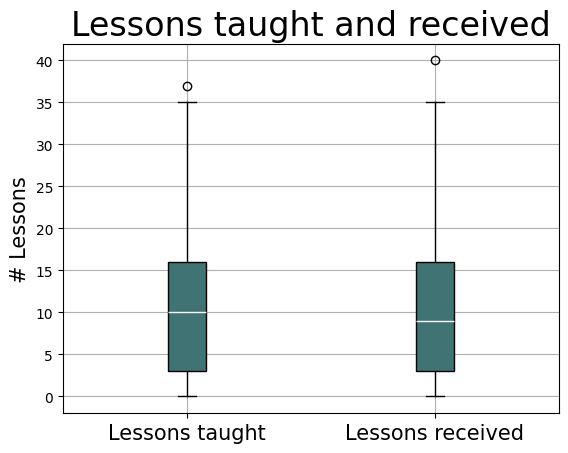

In [23]:

df_skills = df1.rename(columns={"Sum_Skills_Off": "Lessons taught", "Sum_Skills_Rec": "Lessons received"})

boxplot = df_skills.boxplot(column=['Lessons taught', 'Lessons received'], 
                    patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})

plt.title('Lessons taught and received', fontsize = 24)
plt.xlabel('')
plt.ylabel('# Lessons', fontsize = 15)
plt.xticks(fontsize=15)

plt.show()


## 3.5 Teaching and Learning across genders

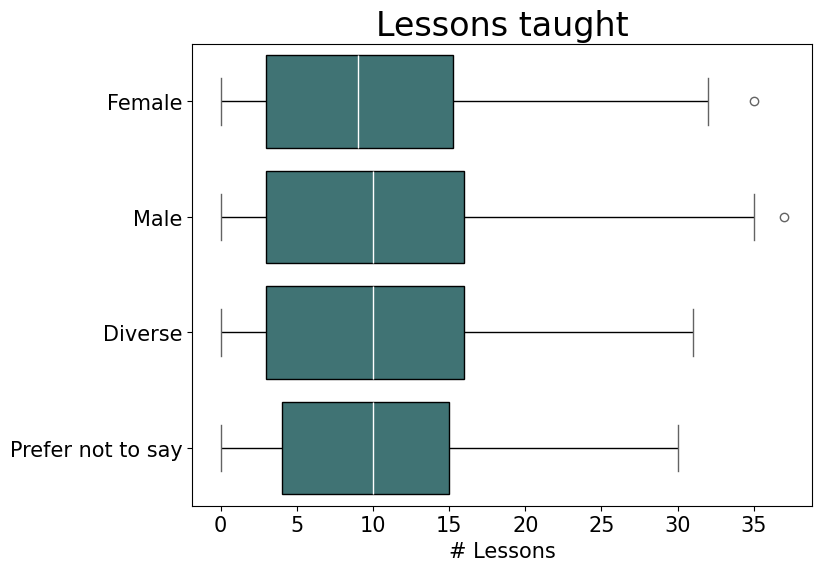

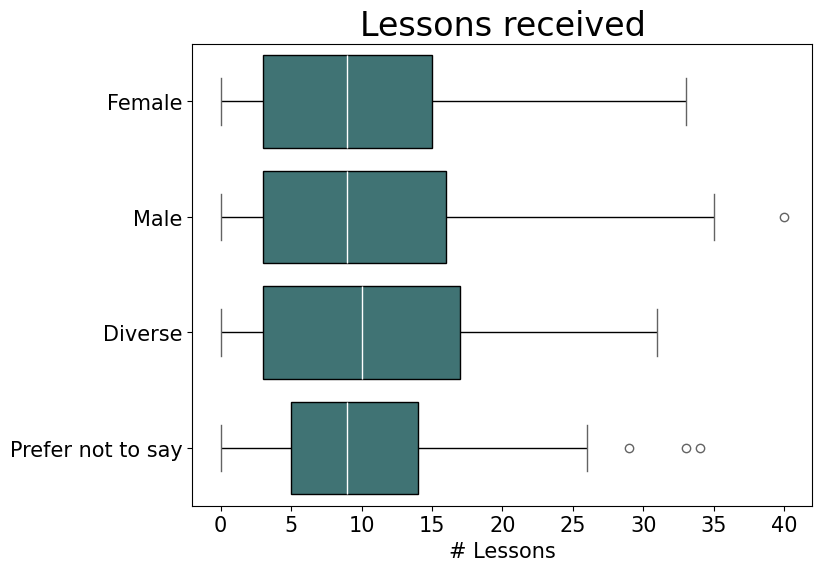

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Gender', x='Sum_Skills_Off', data=df1, color="#82c7a5", 
            patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})
plt.title('Lessons taught', fontsize = 24)
plt.xlabel('# Lessons', fontsize = 15)
plt.ylabel('',fontsize = 15)

plt.yticks(fontsize=15)

plt.xticks(fontsize=15)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='Gender', x='Sum_Skills_Rec', data=df1, color="#82c7a5", 
            patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})
plt.title('Lessons received', fontsize = 24)
plt.xlabel('# Lessons', fontsize = 15)
plt.ylabel('',fontsize = 15)

plt.yticks(fontsize=15)

plt.xticks(fontsize=15)
plt.show()

## 3.6 Top 3 most demanded (taught) skills

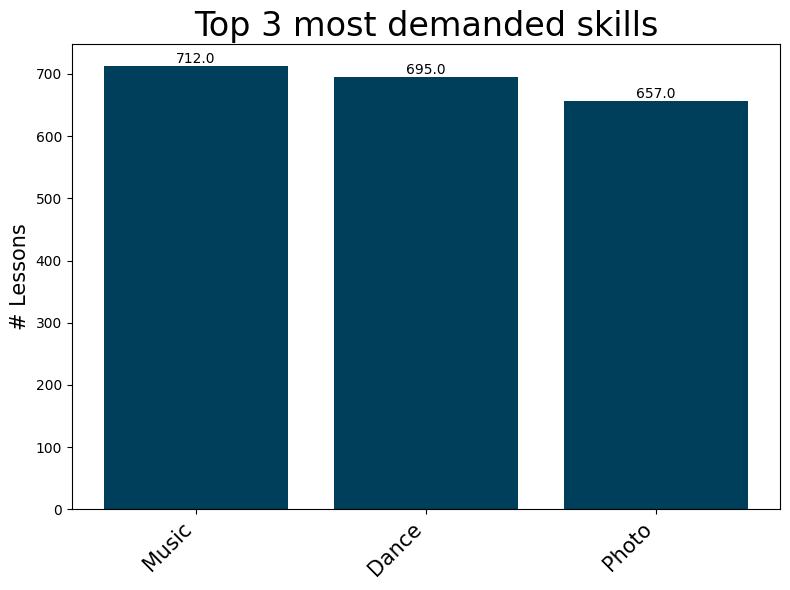

In [25]:
sums = {}
for skill_domain in skill_domains:
    sums[skill_domain] = df1[skill_domain].sum()

top_3 = sorted(sums.items(), key=lambda x: x[1], reverse=True)[:3]

top_3_skills = [item[0] for item in top_3]
top_3_values = [item[1] for item in top_3]

plt.figure(figsize=(8, 6))
plt.bar(top_3_skills, top_3_values, color='#003f5c')

plt.ylabel('# Lessons', fontsize = 15)
plt.title('Top 3 most demanded skills', fontsize = 24)

for i, value in enumerate(top_3_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 3.7 Do people teach more food skills with increasing age (e.g. because they had more time to try many recipes)?

### Result: The relationship between the variables is weak and not statistically significant, as indicated by a correlation coefficient of 0.09 and a p-value of 0.5, suggesting that any observed association between the variables may be due to random chance rather than a meaningful relationship

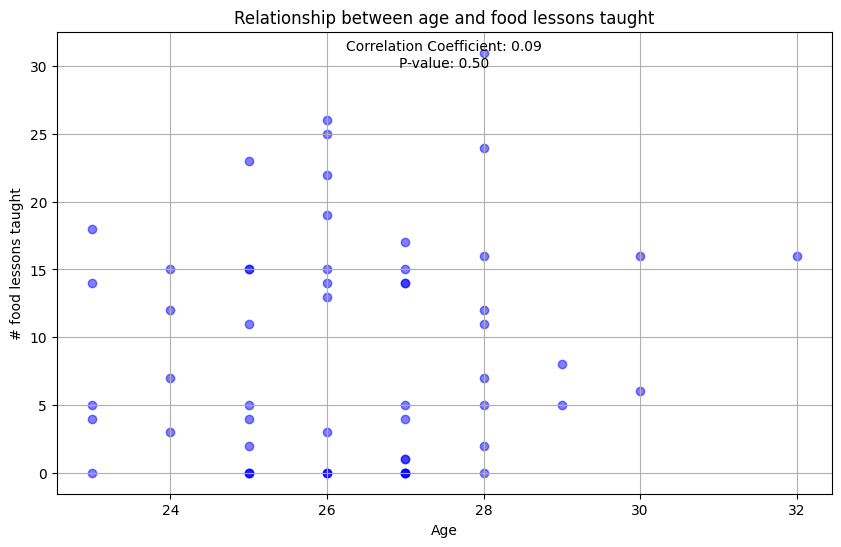

In [31]:
df_cleaned = df1.dropna(subset=['Age', 'Food'])

ages = df_cleaned['Age']
life_skills = df_cleaned['Food']

plt.figure(figsize=(10, 6))
plt.scatter(ages, life_skills, color='blue', alpha=0.5)  
plt.title('Relationship between age and food lessons taught')
plt.xlabel('Age')
plt.ylabel('# food lessons taught')
plt.grid(True)  


correlation_coef, p_value = stats.pearsonr(ages, life_skills)
plt.text(0.5, 0.95, f'Correlation Coefficient: {correlation_coef:.2f}\nP-value: {p_value:.2f}', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


# 4. Platform Experience / Happiness

## 4.1 Rating across feedback categories 

In [29]:
rating_options = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral or Average",
    "Satisfied",
    "Very Satisfied"
]

counts_dict = {}

for column in df1.columns:
    column_counts = df1[column].value_counts()
    counts_dict[column] = {option: column_counts.get(option, 0) for option in rating_options}

counts_df = pd.DataFrame(counts_dict)

counts_df = counts_df.transpose()
rows_to_select = ['Usability', 'Speed_Performance', 'Feature_Satisfaction', 'Security_Satisfaction', 'Customer_Support']
filtered_df = counts_df.loc[rows_to_select]
filtered_df

,Very Dissatisfied,Dissatisfied,Neutral or Average,Satisfied,Very Satisfied
Usability,60,138,210,193,149
Speed_Performance,76,148,201,188,137
Feature_Satisfaction,75,146,196,191,142
Security_Satisfaction,63,153,215,191,128
Customer_Support,60,151,195,190,154


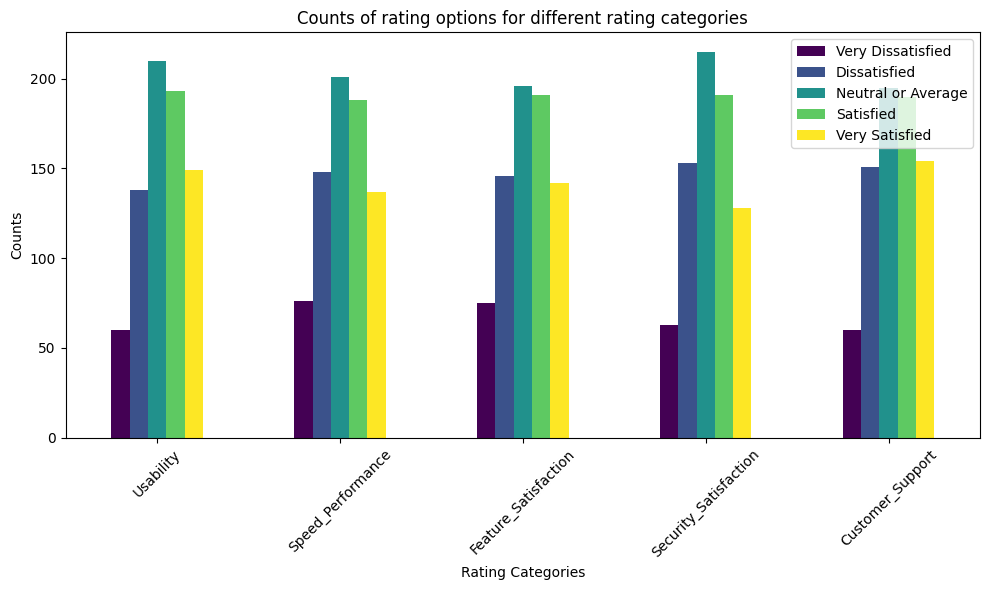

In [30]:
filtered_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Counts of rating options for different rating categories')
plt.xlabel('Rating Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()